# Task 1: Setting the Baseline 

## Task 1.1 Data preparation and validation pipeline

In [1]:
import pandas as pd 
import numpy as np

df_train = pd.read_csv("./data/train_data.csv")
df_test = pd.read_csv("./data/test_data.csv")

In [2]:
df_train.head()

,Unnamed: 0,Age,Gender,Stage,GeneticRisk,TreatmentType,ComorbidityIndex,TreatmentResponse,SurvivalTime,Censored
0,0,65.0,0,2,1.0,0,0.0,0.0,4.2,0
1,1,68.0,1,2,0.0,1,1.0,1.0,4.7,1
2,2,68.0,1,3,1.0,1,0.0,1.0,3.5,1
3,3,81.0,1,4,1.0,1,3.0,0.0,2.3,0
4,4,59.0,1,2,1.0,0,NaN,0.0,NaN,0


In [3]:
df_test.head()

,id,Age,Gender,Stage,GeneticRisk,TreatmentType,ComorbidityIndex,TreatmentResponse
0,0,71.0,1,4,NaN,1,1.0,1.0
1,1,57.0,1,4,0.0,0,NaN,0.0
2,2,66.0,0,2,0.0,0,0.0,1.0
3,3,73.0,0,3,NaN,1,1.0,1.0
4,4,53.0,1,4,0.0,0,0.0,0.0


In [ ]:
# If you don't have missingno installed yet, you can uncomment below:
# !pip install missingno 

*Plot the bar plot of missing values*

In [13]:
import missingno as msno

<AxesSubplot:>

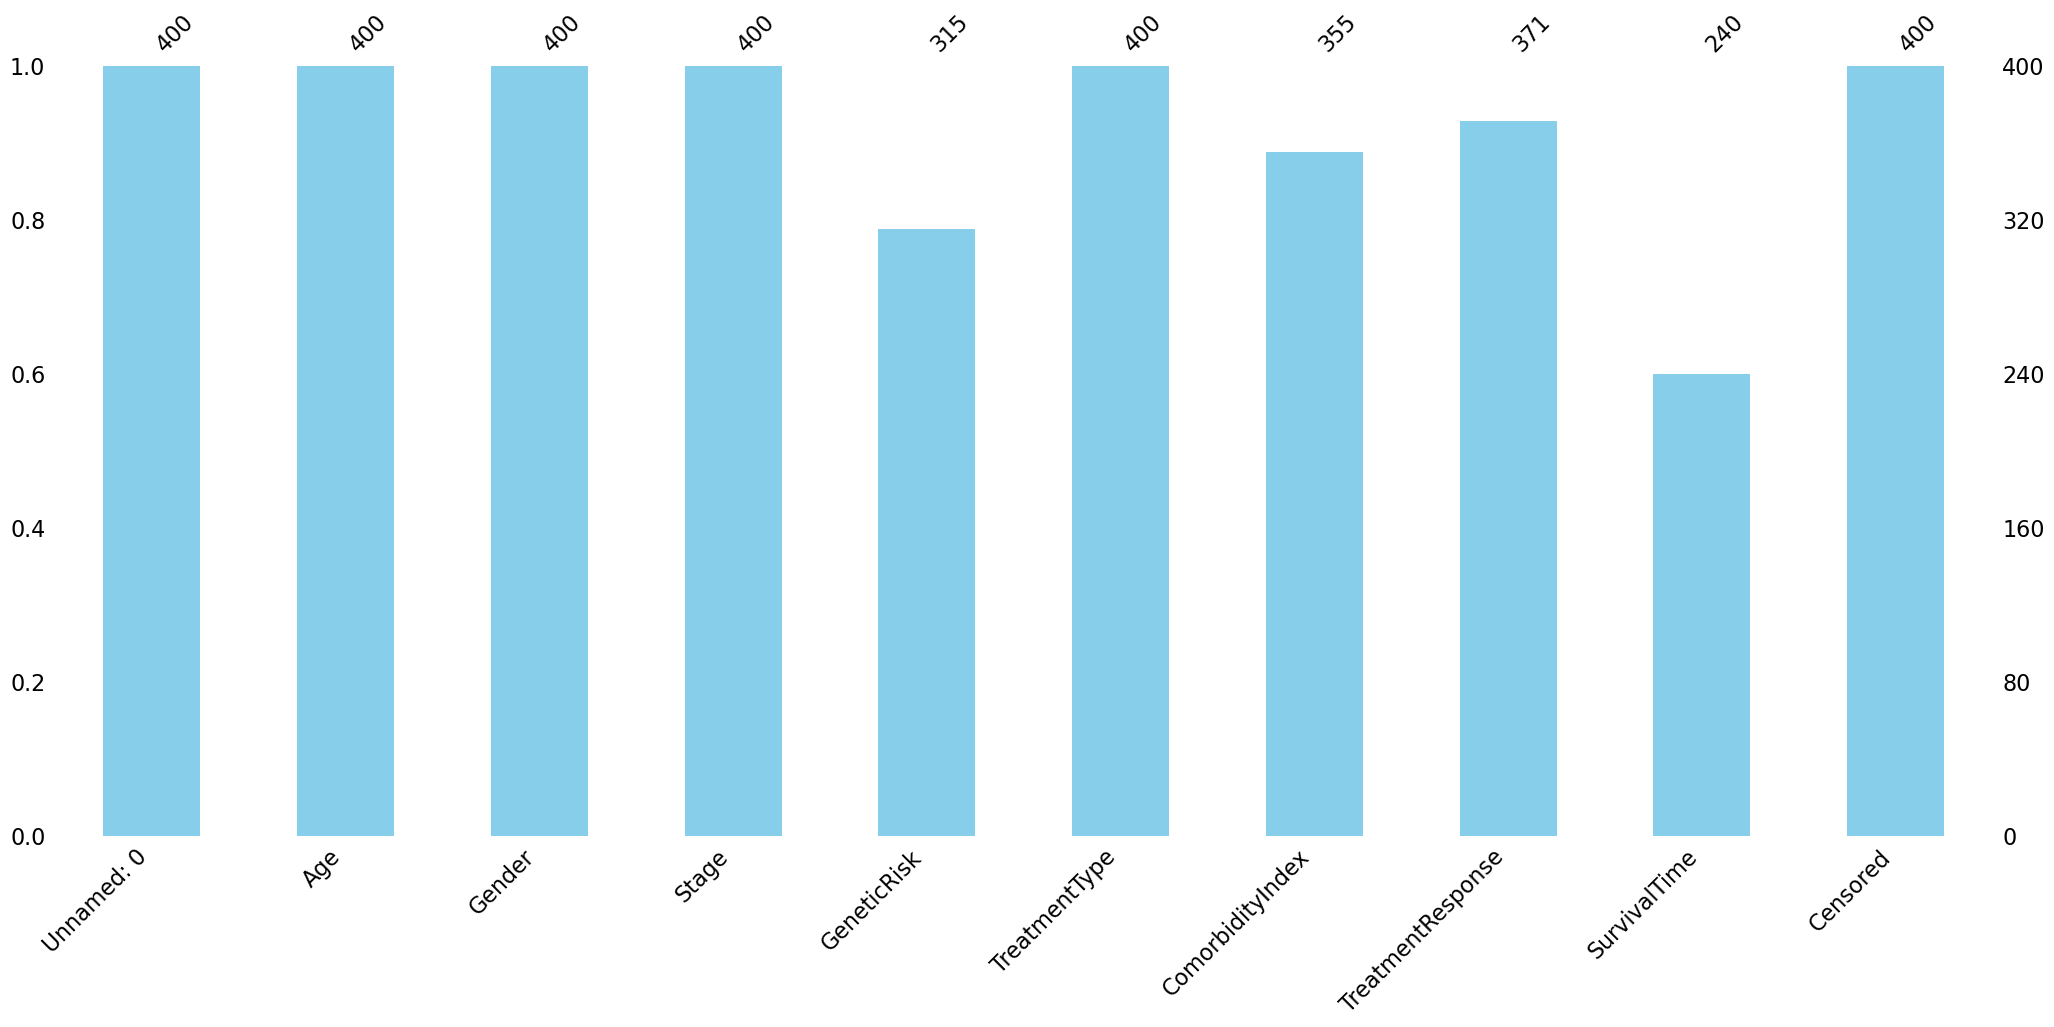

In [14]:
msno.bar(df_train, color = 'skyblue')

In [34]:
print("Summary of the missing\nvalues in the training set\n")
print(df_train.isna().sum())
print()

print("Summary of the missing\nvalues in the test set\n")
print(df_test.isna().sum())

Summary of the missing
values in the training set

Unnamed: 0             0
Age                    0
Gender                 0
Stage                  0
GeneticRisk           85
TreatmentType          0
ComorbidityIndex      45
TreatmentResponse     29
SurvivalTime         160
Censored               0
dtype: int64

Summary of the missing
values in the test set

id                    0
Age                   0
Gender                0
Stage                 0
GeneticRisk          30
TreatmentType         0
ComorbidityIndex     26
TreatmentResponse    15
dtype: int64


<AxesSubplot:>

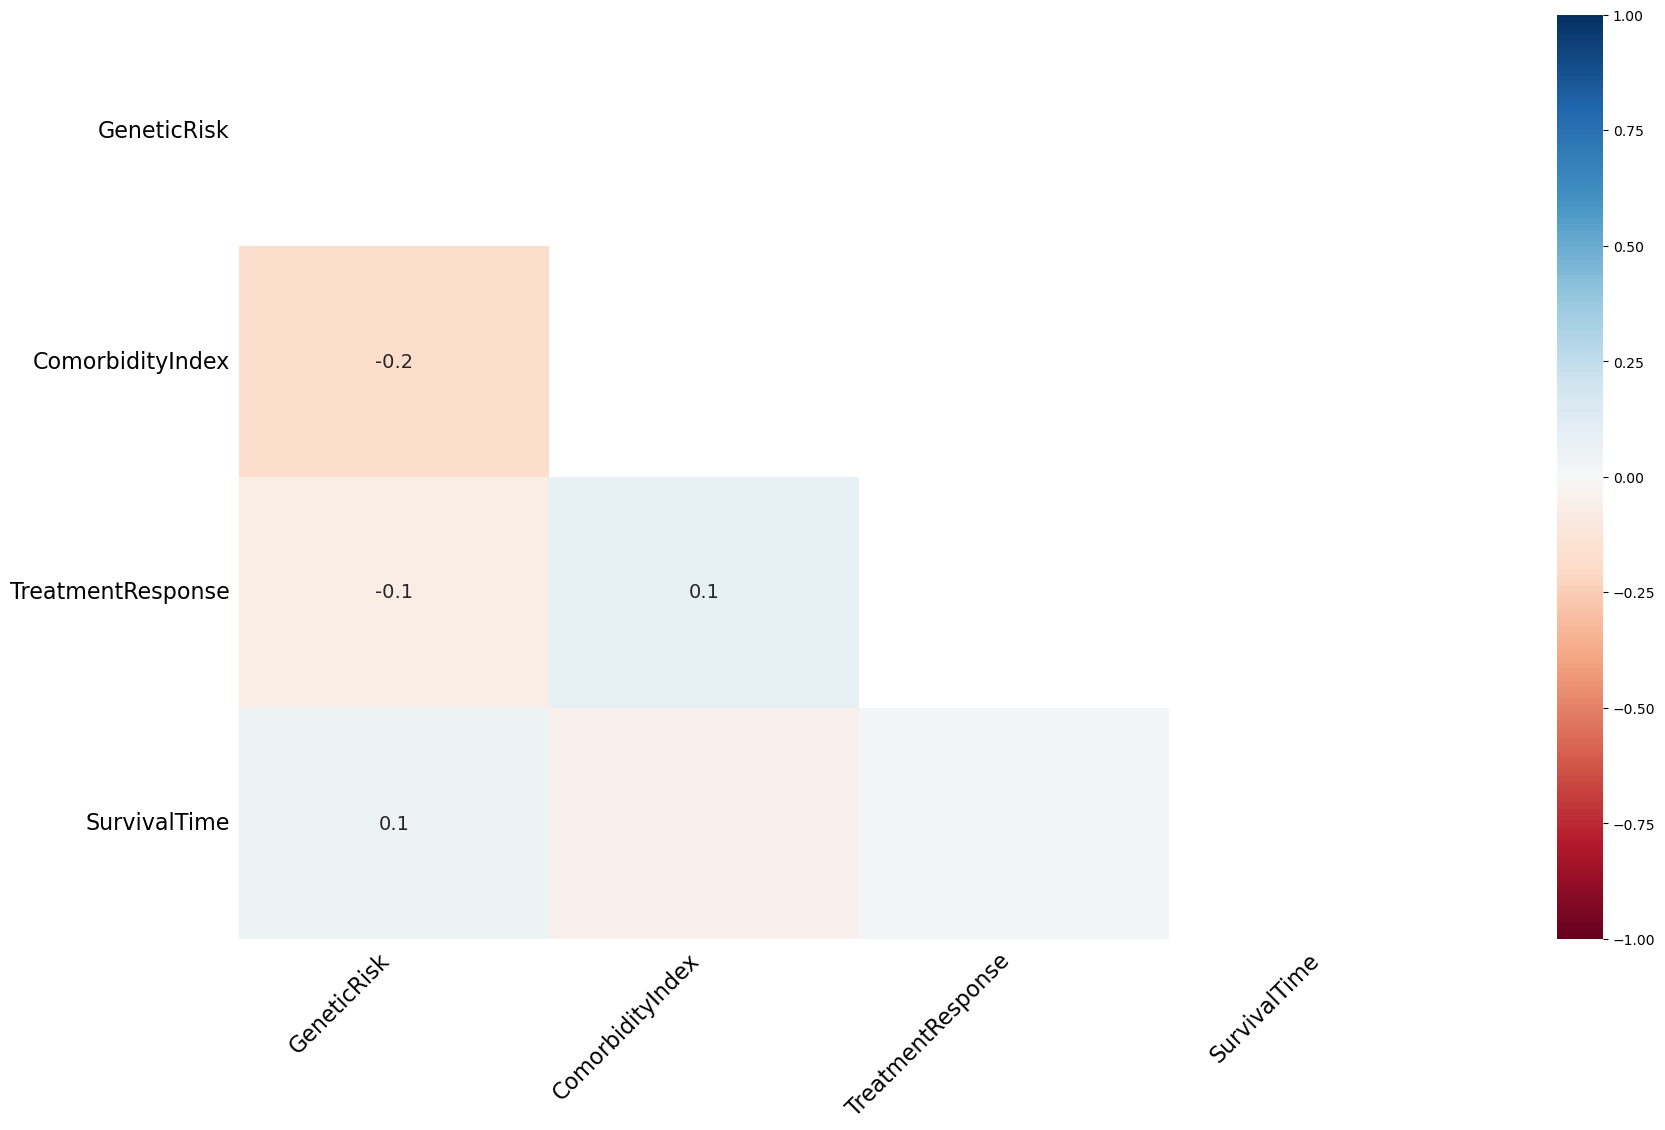

In [16]:
msno.heatmap(df_train)

<AxesSubplot:>

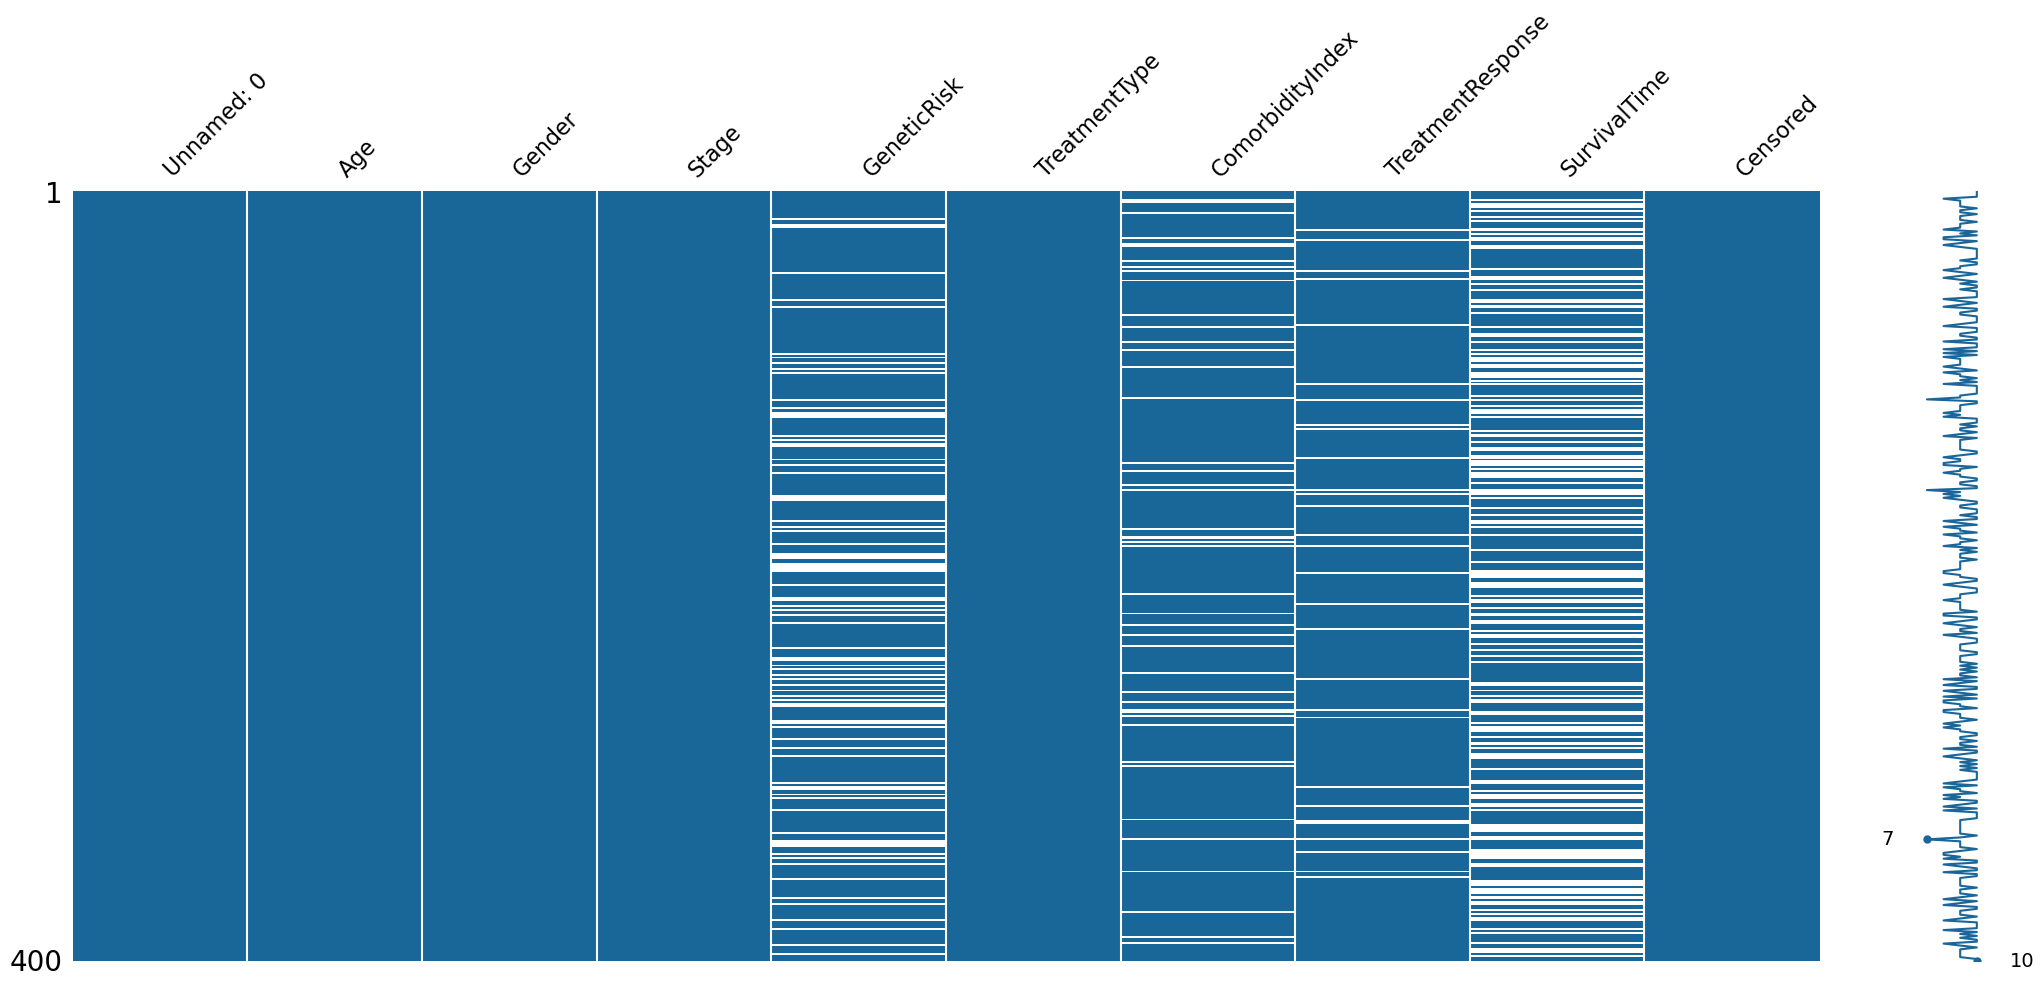

In [33]:
msno.matrix(df_train, color = (0.1, 0.4, 0.6))

<AxesSubplot:>

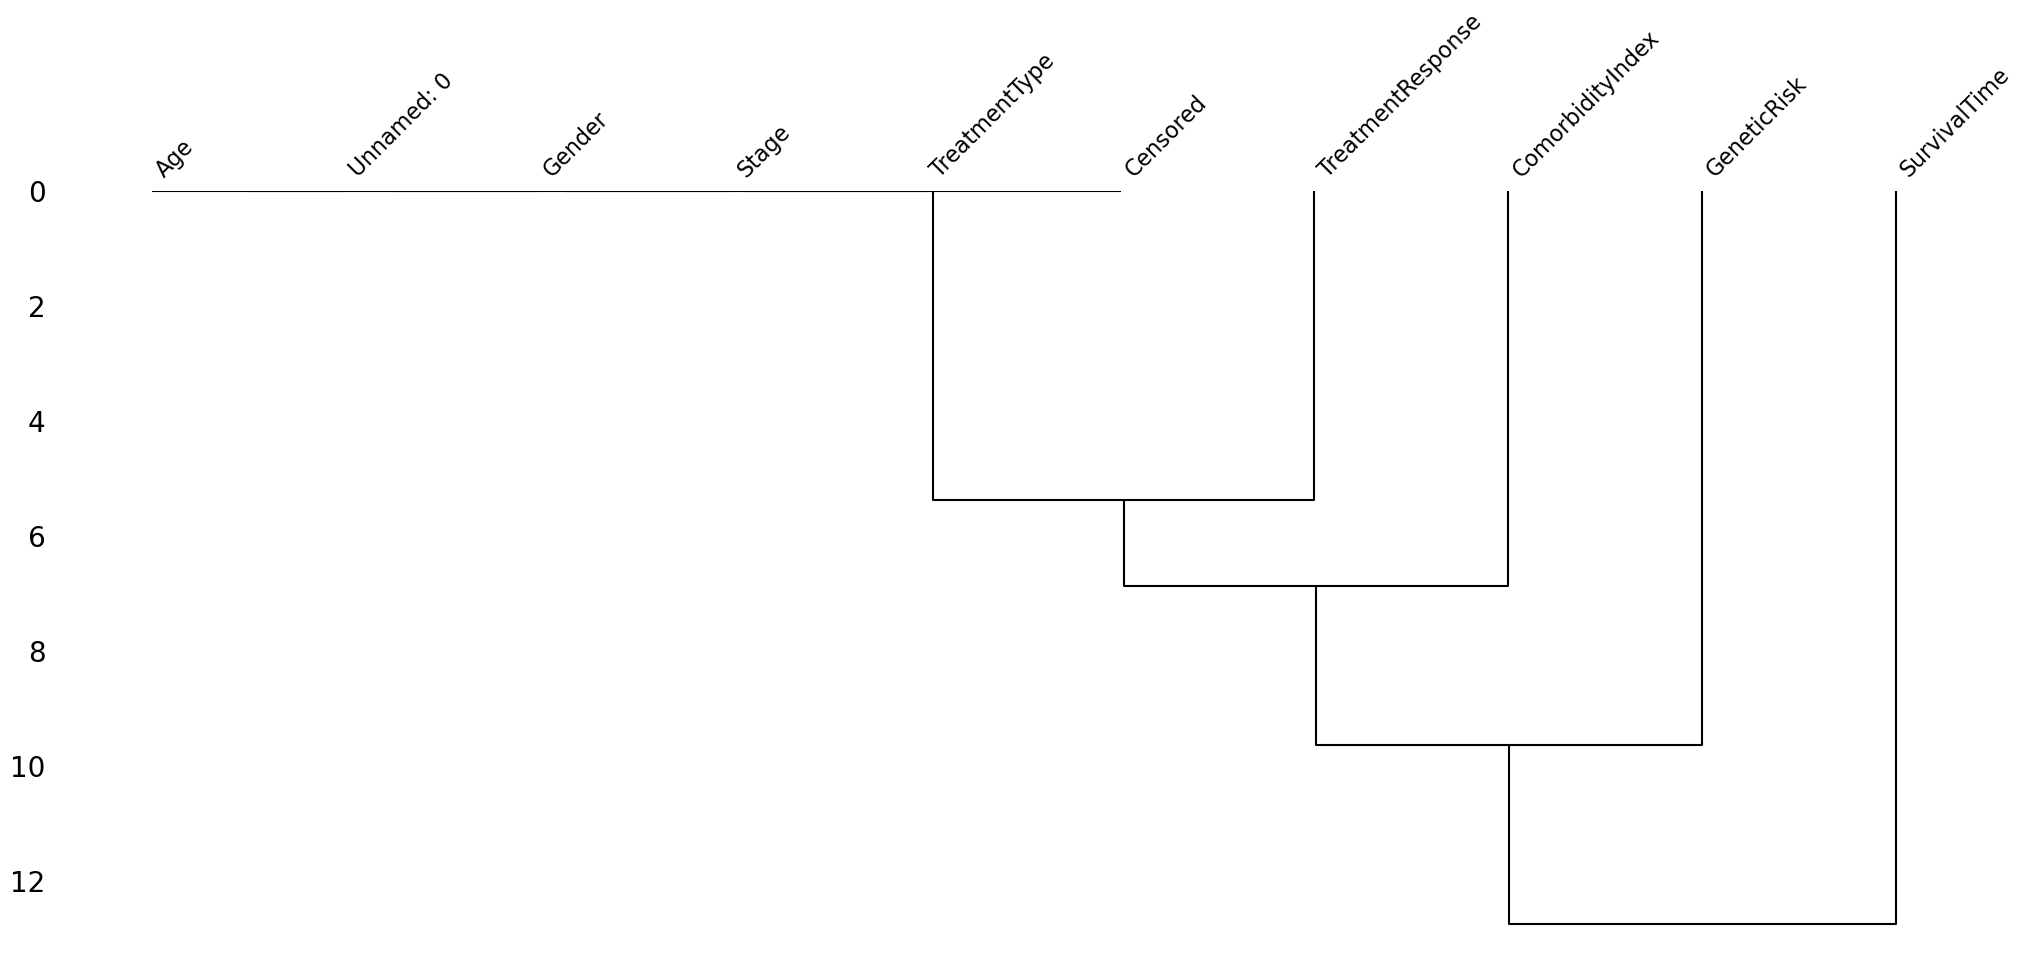

In [18]:
msno.dendrogram(df_train)

*Drop the columns containing the features with missing data and the censored data points, or missing survival time. How many points are there left?*

In [46]:
# drop columns with missing values
df_train_restricted = df_train.drop(columns=["GeneticRisk", "ComorbidityIndex", "TreatmentResponse"])

# drop rows with missing values in 'SurvivalTime' column
df_train_restricted = df_train_restricted.dropna(axis=0)

print("Missing values summary:\n")
print(df_train_restricted.isna().sum())


print("\nNumbers of points left in the restricted dataset: {}".format(len(df_train_restricted)))

Missing values summary:

Unnamed: 0       0
Age              0
Gender           0
Stage            0
TreatmentType    0
SurvivalTime     0
Censored         0
dtype: int64

Numbers of points left in the restricted dataset: 240


*Check the pairplot between the remaining features and the target variable. Analyze and comment in the slides.*

In [ ]:
# TODO

*Define the matrix X with the features as columns and examples as rows, and y as a vector with the Survival Time.*

In [ ]:
# TODO

*Consider a train, validation and test split, against a train, test split, with cross validation. What validation procedure is more data-efficient? Justify your answer with evidence from the dataset.*

In [47]:
# TODO

*Define a metric. As the data is right-censored, we will use the censored Mean Squared Error (cMSE), where c is the censored variable and y is the true Survival Time, both from the ground truth. The variable y_hat contains the predicted Survival Time.*

In [48]:
def error_metric(y, y_hat, c):
    import numpy as np
    err = y-y_hat
    err = (1-c)*err**2 + c*np.maximum(0,err)**2
    return np.sum(err)/err.shape[0]

## Task 1.2 Learn the baseline model

*Learn a baseline model that given the features without missing data, can predict the uncensored, non missing target variable. Your baseline is a Linear Regression model.*

*For the baseline model, make a pipeline and add a StandardScaler instance before the regressor. Note that, for the uncensored data used in this task, the cMSE is equivalent to the MSE.*

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


model = LinearRegression()

pipe = Pipeline(
    [
            ('scaling', StandardScaler()), 
            ("model", model)
    ])
pipe

Pipeline(steps=[('scaling', StandardScaler()), ('model', LinearRegression())])

In [ ]:
# correct the names, when we have them

pipe.fit(some_input_train_data, some_output_train_data)
y_hat = pipe.predict(some_input_validation_or_test_data)
cMSE = error_metric(some_output_validation_or_test_data, y_hat, censored_variable)

*To assess how good your model is, build the y-y hat plot and cMSE and examine them. Comment and document your plots and data on the slides.*

In [ ]:
# TODO

## Task 1.3 Learn with the cMSE

*Compute the expression of the derivative of the cMSE loss, where it is defined. Write your computations on the slides (can be a photo of handwritten math).*

In [ ]:
# TODO

*Implement Gradient Descent as a Python function, using the derivative above.*

In [ ]:
# TODO

*Run Gradient Descent on your problem, and evaluate the model.*

In [ ]:
# TODO

*Experiment with Lasso and Ridge regularization.*

In [ ]:
# TODO

# Task 2 Nonlinear models

## Task 2.1 Development

*Develop functions for training Polynomial and k-Nearest Neighbors on the data prepared in Task 1.1. using the validation procedure determined in Task 1.1 and Task 1.2.*

In [ ]:
# TODO

*Select the model hyperparamenters, like the polynomial degree and the $k$ using cross validation for model selection.*

In [ ]:
# TODO

## Task 2.2 Evaluation

*Evaluate the models developed in Task 2.1 against the baseline. Always back up your analysis with evidence, e.g., by showing a table with the different models and max, min, mean error, and standard deviation of the error.*

In [ ]:
# TODO

# Task 3 Handling missing data

## Task 3.1 Missing data imputation

*Experiment with completing missing data using imputation techniques in Scikit-Learn and here, using the baseline model.*

In [ ]:
# TODO

*Compare the results with Task 1.2  in the slides, using a table with the error statistics and the y-y hat plot. Present evidence of your analysis.*

In [ ]:
# TODO

*Choose the best imputation strategies obtained with the baseline and apply them to the best models of Task 2. Analyze your results and report them in the slides, with evidence from your experiments.*

In [ ]:
# TODO

## Task 3.2 Train models that do not require imputation

*Develop code to apply models and techniques that can directly handle missing data, such as tree-based methods, like decision trees.*

In [ ]:
# TODO

*Experiment with the Scikit-Learn model HistGradientBoostingRegressor, and CatBoost’s CatBoostRegressor. For installation instructions of the CatBoost Library check here. You can use conda or pip.*

*There is a tutorial on using CatBoost for censored data here (in ML website). Try the Accelerated Failure Time (AFT) CatBoost applied to the assignment data.*

In [ ]:
# TODO

## Task 3.3 Evaluation

*Compare the results of the strategies developed in Task 3.1 and 3.2 with the baseline model in the slides, using a table with the error statistics and the y-y hat plot. Present evidence of your analysis.*

In [ ]:
# TODO

*Try the best imputation strategies of Task 3.1, impute the data, run the best model of task 3.2 and compare with the baseline in the slides.*

In [ ]:
# TODO

# Task 4 Semi-supervised learning for unlabeled data

## Task 4.1 Imputation with labeled and unlabeled data

*Take the best imputation methods from Task 3.1 and use the data with labels and the data without labels to fit the imputers. Then, use the imputed data with labels to train a Linear Regression model. Compare with the baseline and with the model trained in Task 3.1.*

In [ ]:
# TODO

*Use the labelled and unlabelled data to train an Isomap lower dimensional representation of the data. See [here](https://youtu.be/H-Cz32zoy5g?si=m871_tJEZ8Gk3e_j) for more details on the model.
You will need to train the isomap transformer with the complete supervised + unsupervised dataset.*


*To be able to add the semi-supervised isomap transformer model to a pipeline we will need the following wrapper code below:*

In [ ]:
from sklearn.base import BaseEstimator

class FrozenTransformer(BaseEstimator):
    def __init__(self, fitted_transformer):
        self.fitted_transformer = fitted_transformer

    def __getattr__(self, name):
        # `fitted_transformer`'s attributes are now accessible
        return getattr(self.fitted_transformer, name)

    def __sklearn_clone__(self):
        return self

    def fit(self, X, y=None):
        # Fitting does not change the state of the estimator
        return self

    def transform(self, X, y=None):
        # transform only transforms the data
        return self.fitted_transformer.transform(X)

    def fit_transform(self, X, y=None):
        # fit_transform only transforms the data
        return self.fitted_transformer.transform(X)

*and the FrozenTransformer can be used as*

In [ ]:
from sklearn.manifold import Isomap
from sklearn.pipeline import make_pipeline

# Impute missing values with the best imputers from Task 3.1
imp = SimpleImputer()
# X is the union of the unsupervised and (train) supervised feature datasets
X = imp.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)
# Try different numbers of components.
iso = Isomap(n_components=2)
iso.fit(X)

pipe = make_pipeline(SimpleImputer(),
                     scaler,
                     FrozenTransformer(iso), # <- Here is the Frozen Isomap
                     LinearRegression())

# (X_train, y_train) is the labeled, supervised data
pipe.fit(X_train, y_train)

In [ ]:
# TODO

## Task 4.2 Evaluation

*Compare the results of the strategies developed in Task 4.1  with the baseline model in the slides, using a table with the error statistics and the y-y hat plot. Present evidence of your analysis.*

In [ ]:
# TODO

*Try the best imputation strategies of Task 3.1, impute the data, run the best model of task 3.2 and compare with the baseline in the slides.*

In [ ]:
# TODO

# Task 5 [optional]

*To build your final model, use anything you have learned in the ML course.*

In [ ]:
# TODO